# Rock Paper Scissors

In [8]:
import tensorflow as tf
!pip install split-folders
import splitfolders
import zipfile
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import keras
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [6]:
!unzip '/content/drive/MyDrive/dataset/rockpaperscissors.zip' -d '/content/result/'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/result/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /content/result/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /content/result/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /content/result/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /content/result/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /content/result/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /content/result/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /content/result/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /content/result/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /content/result/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /content/result/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /con

In [11]:
import zipfile,os

base_dir = '/content/result/rockpaperscissors'
output_dir = os.path.join(base_dir, 'main')

In [12]:
rps_dir = os.path.join(base_dir, 'rps-cv-images')
if os.path.exists(rps_dir):
  shutil.rmtree(rps_dir)
  print("Folder terhapus")

if os.path.exists(os.path.join(base_dir, 'README_rpc-cv-images.txt')):
  os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))
  print("File terhapus")

Folder terhapus
File terhapus


In [13]:
splitfolders.ratio(
    base_dir,
    output_dir,
    seed=None,
    ratio=(.6,.4)
)

Copying files: 2188 files [00:04, 480.48 files/s]


In [14]:
paper_dir = os.path.join(base_dir, 'paper')
train_paper_dir = os.path.join(output_dir, 'train/paper')
val_paper_dir = os.path.join(output_dir, 'val/paper')

rock_dir = os.path.join(base_dir, 'rock')
train_rock_dir = os.path.join(output_dir, 'train/rock')
val_rock_dir = os.path.join(output_dir, 'val/rock')

scissors_dir = os.path.join(base_dir, 'scissors')
train_scissors_dir = os.path.join(output_dir, 'train/scissors')
val_scissors_dir = os.path.join(output_dir, 'val/scissors')

In [15]:
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'val')

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8,1.2]
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [19]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.RMSprop(learning_rate = 0.001, rho = 0.9),
    metrics=['accuracy']
)

In [22]:
class MyCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.975):
      print('\nAkurasi sudah baik, karena melebihi 0.975')
      self.model.stop_training = True

myCallback = MyCallback()

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    callbacks=[myCallback]
)

Epoch 1/20
25/25 - 29s - loss: 1.1099 - accuracy: 0.3713 - val_loss: 1.0723 - val_accuracy: 0.3313 - 29s/epoch - 1s/step
Epoch 2/20
25/25 - 29s - loss: 0.9409 - accuracy: 0.5713 - val_loss: 0.5028 - val_accuracy: 0.8125 - 29s/epoch - 1s/step
Epoch 3/20
25/25 - 34s - loss: 0.5807 - accuracy: 0.7738 - val_loss: 0.2747 - val_accuracy: 0.9125 - 34s/epoch - 1s/step
Epoch 4/20
25/25 - 28s - loss: 0.3956 - accuracy: 0.8487 - val_loss: 0.1870 - val_accuracy: 0.9563 - 28s/epoch - 1s/step
Epoch 5/20
25/25 - 30s - loss: 0.2963 - accuracy: 0.8988 - val_loss: 0.1858 - val_accuracy: 0.9375 - 30s/epoch - 1s/step
Epoch 6/20
25/25 - 27s - loss: 0.2711 - accuracy: 0.9050 - val_loss: 0.2012 - val_accuracy: 0.9375 - 27s/epoch - 1s/step
Epoch 7/20
25/25 - 27s - loss: 0.2344 - accuracy: 0.9112 - val_loss: 0.2062 - val_accuracy: 0.9187 - 27s/epoch - 1s/step
Epoch 8/20
25/25 - 29s - loss: 0.2397 - accuracy: 0.9025 - val_loss: 0.1630 - val_accuracy: 0.9312 - 29s/epoch - 1s/step
Epoch 9/20
25/25 - 29s - loss: 0

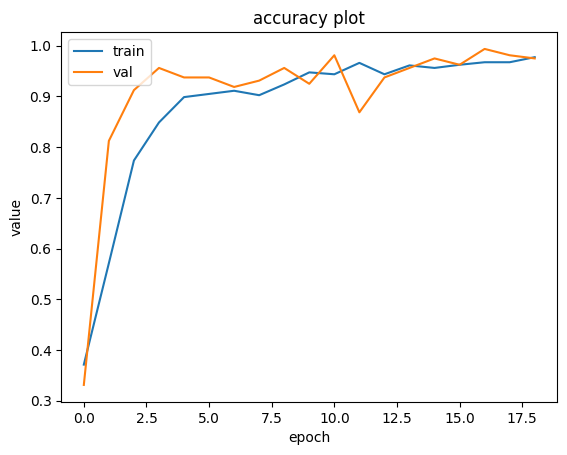

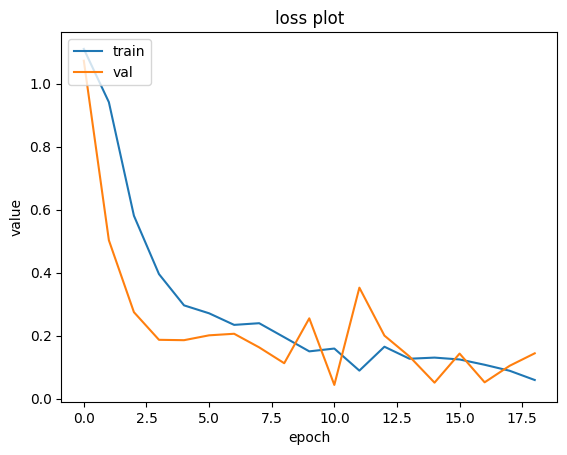

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
1/1 [==============================] - 0s 28ms/step
0CSaM2vL2cWX6Cay.png
scissors


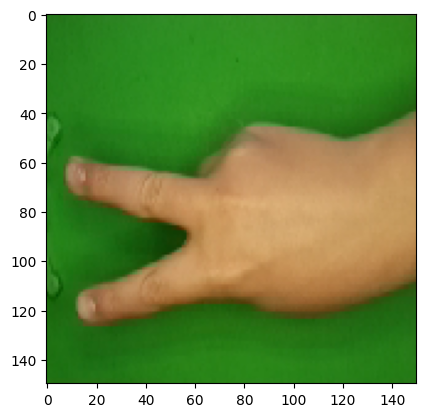

In [28]:
%matplotlib inline

uploaded = files.upload()

for path in uploaded.keys():

  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(path)
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  else:
    print('scissors')